# Absolute vs. Relative Frequency

The frequency is the number of times a particular value for a variable (data item) has been observed to occur. The frequency of a value can be expressed in different ways, depending on the purpose required. 

- The **absolute frequency** describes the number of times a particular value for a variable (data item) has been observed to occur. The simplest way to express a frequency is in absolute terms.
- A **relative frequency** describes the number of times a particular value for a variable (data item) has been observed to occur in relation to the total number of values for that variable. The relative frequency is calculated by dividing the absolute frequency by the total number of values for the variable. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# this allow to use matplotlib in the notebook
%matplotlib inline 

In [2]:
# importing data
pokemon_data = pd.read_csv('./data/pokemon.csv')
pokemon_data.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


To make analysis of data in table easier, we can reshape the data into a more computer-friendly form using Pandas in Python. Pandas.melt() is one of the function to do so.

melt() unpivots a DataFrame from wide format to long format.

In [3]:
pkmn_type = pokemon_data.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'], var_name='type_level', value_name='type').dropna()
pkmn_type[500:530]

,id,species,type_level,type
500,501,oshawott,type_1,water
501,502,dewott,type_1,water
502,503,samurott,type_1,water
503,504,patrat,type_1,normal
504,505,watchog,type_1,normal
505,506,lillipup,type_1,normal
506,507,herdier,type_1,normal
507,508,stoutland,type_1,normal
508,509,purrloin,type_1,dark
509,510,liepard,type_1,dark


seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts

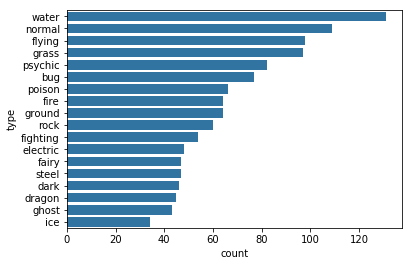

In [4]:
count_type = pkmn_type['type'].value_counts()
sb.countplot(data=pkmn_type, y='type', order=count_type.index, color=sb.color_palette()[0])

To understand the distribution of data or want to compare levels in terms of proportions of the whole, we want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions.

In [5]:
pkmn_shape = pkmn_type.shape[0]
max_count = pkmn_type['type'].value_counts().max()
max_prop = max_count/pkmn_shape

print('elements ', pkmn_shape)
print('max_count ', max_count)
print('max_prop ', max_prop)

elements  1212
max_count  131
max_prop  0.10808580858085809


generate tick mark locations and names

In [6]:
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

Text(0.5,0,'proportion')

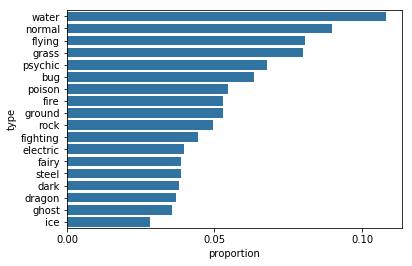

In [7]:
sb.countplot(data=pkmn_type, y='type', order=count_type.index, color=sb.color_palette()[0])
plt.xticks(tick_props * pkmn_shape, tick_names)
plt.xlabel('proportion')

However, soemtimes is more useful to add to represent the absolute frequency and a label for each bar with the information about the realtive frequency. 

To do so, we must:
- create the plot
- add annotations
- loop through each pair of locations and labels
- get the text property for the label to get the correct count
- print the annotation just below the top of the bar

This means that the plot is modified after it's generation.

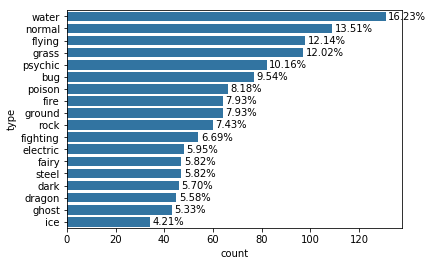

In [8]:
sb.countplot(data=pkmn_type, y='type', order=count_type.index, color=sb.color_palette()[0])

# get the total number of samples
n_points = pokemon_data.shape[0]

# counts for each value the absolute frequency for the column type 
counts = pkmn_type['type'].value_counts()

for i in range(counts.shape[0]):
    count = counts[i]
    pct_str = '{:0.2f}%'.format(100*count/n_points)
    # the text function prints each percentage, with the x-position, y-position, and string as the three main parameters to the function.
    plt.text(count+1, i, pct_str, va= 'center')

To increase the size of the chart, we must set the size of the plt figure by using the [figure method](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) and figsize property

plt.figure(figsize=(16, 6))

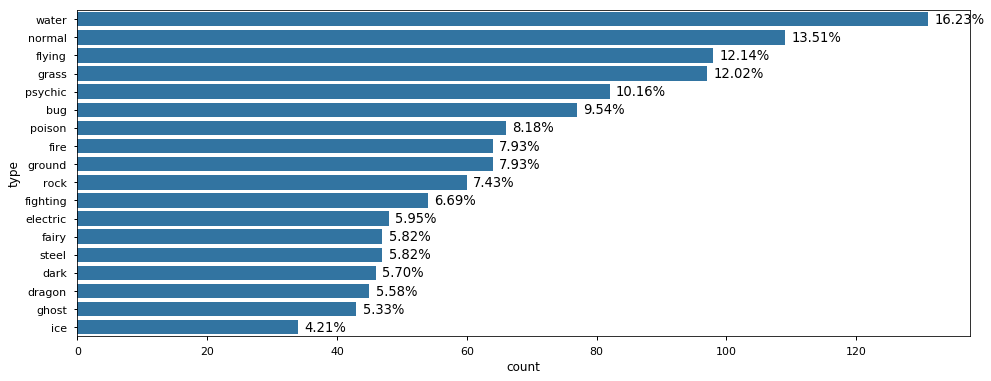

In [9]:
sb.set_context("notebook", font_scale=1.1)
plt.figure(figsize=(16, 6))
sb.countplot(data=pkmn_type, y='type', order=count_type.index, color=sb.color_palette()[0])

# get the total number of samples
n_points = pokemon_data.shape[0]

# counts for each value the absolute frequency for the column type 
counts = pkmn_type['type'].value_counts()

for i in range(counts.shape[0]):
    count = counts[i]
    pct_str = '{:0.2f}%'.format(100*count/n_points)
    # the text function prints each percentage, with the x-position, y-position, and string as the three main parameters to the function.
    plt.text(count+1, i, pct_str, va= 'center')

### Counting Missing Data
One interesting way we can apply bar charts is through the visualization of missing data. 

In [10]:
pokemon_data.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

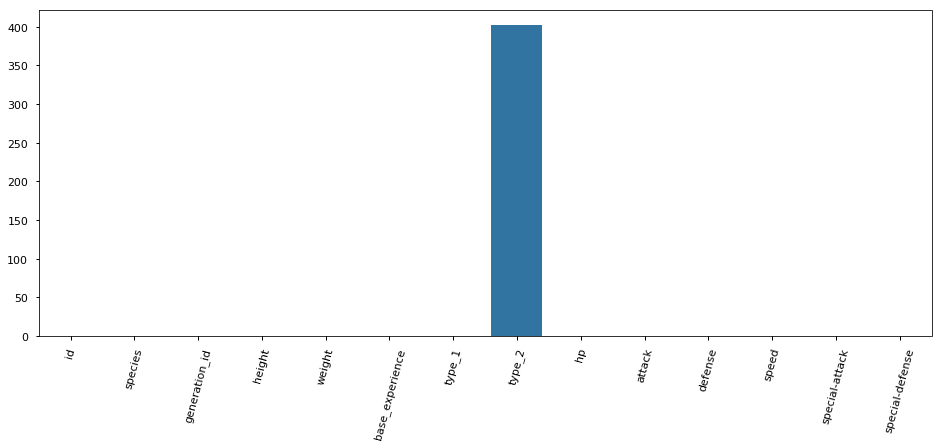

In [11]:
na_counts = pokemon_data.isna().sum()
base_color = sb.color_palette()[0]
plt.figure(figsize=(16, 6))
plt.xticks(rotation=75)
sb.set_context("notebook", font_scale=1.1)
sb.barplot(na_counts.index.values, na_counts, color = base_color)